本案例将分析乘客的生存率与各维度之间的关系，并预测乘客是否生还。

特征说明：PassengerId 乘客编号；Survived 存活情况（存活：1 ; 死亡：0）；Pclass 客舱等级；Name 乘客姓名；Sex 性别；Age 年龄；SibSp 同乘的兄弟姐妹；配偶数；Parch 同乘的父母/小孩数;Ticket 船票编号；Fare 船票价格；Cabin 客舱号；Embarked 登船港口

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# 将数据读入
data = pd.read_csv('E:/Titanic.csv',index_col = 'PassengerId')

In [4]:
# 对数据进行预览
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


可以看出Age、Cabin、Embarked这三个特征存在缺失值

In [6]:
# 针对缺失值的多少采取不同的措施，此处Cabin列缺失值较多，可将缺失值单独作为一个类别进行分析，用U填充缺失值填充缺失值
data['Cabin'].fillna('U',inplace = True)

In [7]:
# Embarked仅缺失两个值，使用众数进行填充
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)

In [8]:
# Age缺失值较多，使用随机森林模型预测缺失Age并将预测值填充到Age缺失值列

age_data = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]
age_null = age_data.loc[data['Age'].isnull(),:]
age_notnull = age_data.loc[data['Age'].notnull(),:]
x = age_notnull.drop('Age',1).values
y = age_notnull['Age'].values

In [9]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(x,y)
age_pred = rfr.predict(age_null.drop('Age',1))
data.loc[data['Age'].isnull(),'Age']= age_pred

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


缺失值已经全部被填充

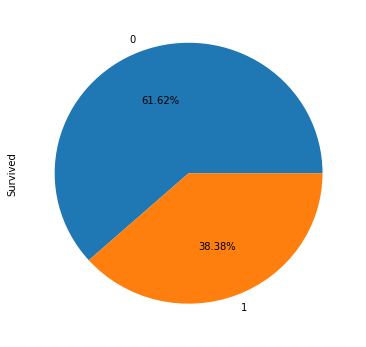

In [11]:
# 存活比例
plt.figure(figsize = (6,6))
data.Survived.value_counts().plot.pie(autopct = '%1.2f%%')

可以看出乘客的生还率占百分之38.38

Text(0,0.5,'survived rate')

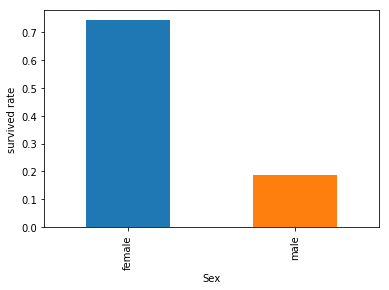

In [12]:
# 性别与存活的关系
data.groupby(['Sex']).Survived.mean().plot.bar()
plt.ylabel('survived rate')

基于女士优先原则，女性的生还比例要高于男性好几倍

In [13]:
# 船舱等级分布
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

三等舱的乘客最多，一等舱次之，二等舱最少

Text(0,0.5,'survived rate')

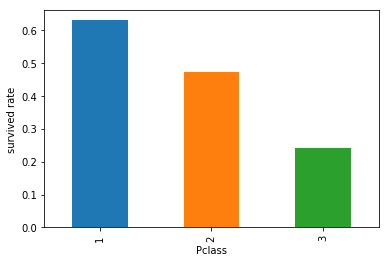

In [14]:
#船舱等级与存活率的关系
data.groupby('Pclass').Survived.mean().plot.bar()
plt.ylabel('survived rate')

可以看出一等舱存活率最高，二等舱次之，三等舱存活率最低

In [15]:
#不同等级船舱下的男女生存率
data.groupby(['Pclass','Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

一等舱的女性生还率最高，三等舱的男性生还率最低

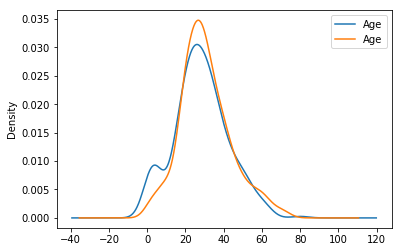

In [16]:
#年龄分布
data_age_survived = data.loc[data['Survived'] == 1,'Age']
data_age_notsurvived = data.loc[data['Survived'] == 0,'Age']
data_age_survived.plot.kde()
data_age_notsurvived.plot.kde()
plt.legend()

乘客年龄多数分布在20到40岁之间，其中未生存人群密度曲线更尖峭，即未生还人群中20-40岁人群比例要高于生还人群

In [17]:
data.Age.describe()

count    891.000000
mean      29.665705
std       13.735283
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

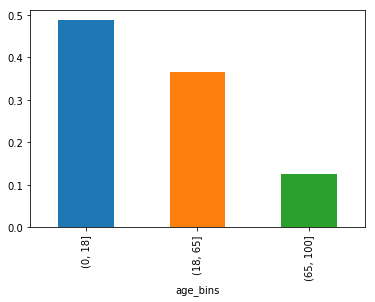

In [18]:
#对年龄段进行分析
data['age_bins'] = pd.cut(data['Age'],[0,18,65,100])
data.groupby('age_bins').Survived.mean().plot.bar()

0-18岁的未成年乘客存活率最高，65-100岁的老年乘客存活率最低

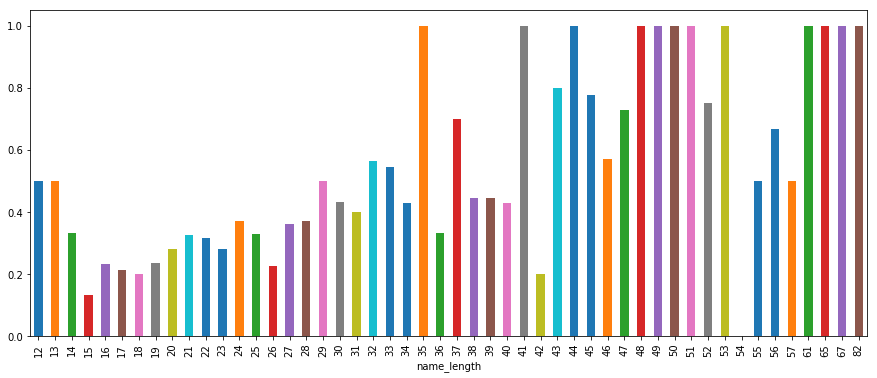

In [19]:
# 名字长度与生存率之间的关系
plt.figure(figsize = (15,6))
data['name_length'] = data.Name.map(len)
data.groupby('name_length').Survived.mean().plot.bar()

从分布上大致来看，名字较长的人群普遍生存率较高

In [20]:
# 有兄弟姐妹陪同的情况下与存活的关系
no_sib = data.loc[data['SibSp'] == 0,:]
sib = data.loc[data['SibSp'] != 0,:]

print('无兄弟姐妹陪同的存活率:',(no_sib['Survived'].mean()))
print('有兄弟姐妹陪同的存活率:',(sib['Survived'].mean()))


无兄弟姐妹陪同的存活率: 0.34539473684210525
有兄弟姐妹陪同的存活率: 0.4664310954063604


有兄弟姐妹陪同的情况下乘客的存活率较高

In [21]:
# 有父母子女陪同的情况下与存活的关系
no_par = data.loc[data['Parch'] == 0,:]
par = data.loc[data['Parch'] != 0,:]

print('无父母子女陪同的存活率',(no_par['Survived'].mean()))
print('有父母子女陪同的存活率',(par['Survived'].mean()))


无父母子女陪同的存活率 0.34365781710914456
有父母子女陪同的存活率 0.5117370892018779


与SibSp类似，有父母子女陪同的情况下的乘客存活率较高

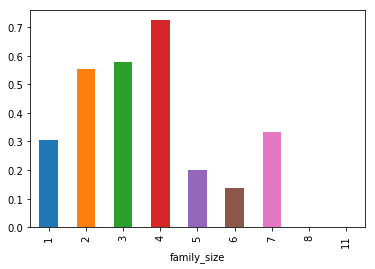

In [22]:
# 亲友（父母子女及兄弟姐妹）的数量与存活的关系
data['family_size'] = data['Parch'] + data['SibSp'] + 1
data.groupby('family_size').Survived.mean().plot.bar()

可以看出亲友数量从1到4生存率是逐渐攀升的，但超过4个后陡降，亲友数量过多或者过少都会导致生存率降低

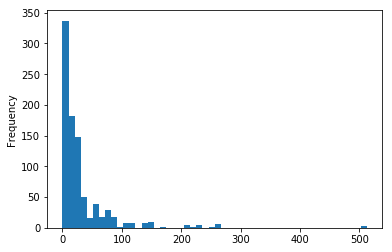

In [23]:
# 票价分布
data.Fare.plot.hist(bins = 50)

可以看出低票价占比较高

Text(0,0.5,'Fare')

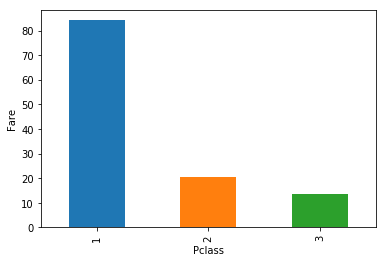

In [24]:
# 客舱等级与票价的关系
data.groupby('Pclass').Fare.mean().plot.bar()
plt.ylabel('Fare')

客舱1的票价均值最高，客舱2次之，客舱3最低

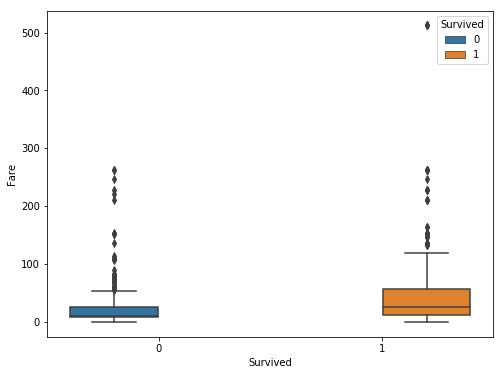

In [25]:
#票价与生存的关系
plt.figure(figsize = (8,6))
sns.boxplot(x = data['Survived'],y = data['Fare'],hue = data['Survived'])

通过箱型图可以看出，生还者的票价总体分布高于未生还者

In [26]:
# 客舱号与存活的关系，其中U代表该乘客无客舱号
no_cab = data.loc[data['Cabin'] == 'U',:]
cab = data.loc[data['Cabin'] != 'U',:]

print('无客舱号时的存活率：',(no_cab['Survived'].mean()))
print('有客舱号时的存活率：',(cab['Survived'].mean()))

无客舱号时的存活率： 0.29985443959243085
有客舱号时的存活率： 0.6666666666666666


乘客有客舱号的情况下生还率要比无客舱号的情况下高出一倍多

In [27]:
# 提取客舱号中的字母作为新特征
data['CabinLetter'] = data['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())

Text(0,0.5,'survived rate')

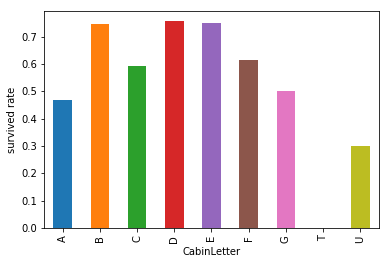

In [28]:
#包含不同字母的客舱号的生存率
data.groupby('CabinLetter').Survived.mean().plot.bar()
plt.ylabel('survived rate')

可以看出无客舱号、客舱号为T时生还率低，客舱号包含B、D、E字母的乘客生还率高

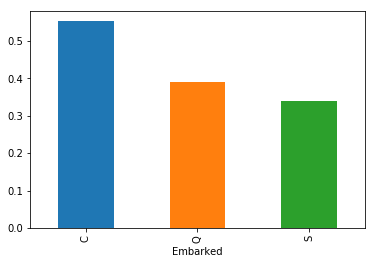

In [29]:
#登船港口与生存率的关系
data.groupby('Embarked').Survived.mean().plot.bar()

不同港口上船的人生存率不同，C最高，Q次之，S最低

In [30]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,name_length,family_size,CabinLetter
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,"(18, 65]",23,2,U
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18, 65]",51,2,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,"(18, 65]",22,1,U
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18, 65]",44,2,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,"(18, 65]",24,1,U


In [31]:
data.drop(['Name','Cabin'],1,inplace = True)

In [32]:
#各特征的取值数目
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare','Embarked', 'age_bins', 'name_length', 'CabinLetter']
for col in cols:
    print(col,'的取值数目为：',data[col].unique().shape[0])

Survived 的取值数目为： 2
Pclass 的取值数目为： 3
Sex 的取值数目为： 2
Age 的取值数目为： 176
SibSp 的取值数目为： 7
Parch 的取值数目为： 7
Ticket 的取值数目为： 681
Fare 的取值数目为： 248
Embarked 的取值数目为： 3
age_bins 的取值数目为： 3
name_length 的取值数目为： 50
CabinLetter 的取值数目为： 9


In [33]:
# Ticket的重复值为团购票，将票价均分到个人
data['Fare'] = data.Fare/(data.groupby('Ticket')['Ticket'].transform('count'))

In [34]:
#Ticket分为纯数字、开头为字母的记录两类,分别用num,letter代替
ticket_nl = np.where(data['Ticket'].str[0].map(lambda x:x.isnumeric()),'num','letter')
data['Ticket'] = ticket_nl

In [35]:
# 独热编码处理
data = pd.get_dummies(data)

In [36]:
# 量纲缩放
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data['Age'] = ss.fit_transform(data.Age.values.reshape(-1,1))
data['Fare'] = ss.fit_transform(data.Fare.values.reshape(-1,1))
data['name_length'] = ss.fit_transform(data.name_length.values.reshape(-1,1))

E:\Anaconda3-5.2.0-Windows-x86_64\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Anaconda3-5.2.0-Windows-x86_64\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
# 将数据集分为训练集和测试集
from sklearn.model_selection import train_test_split

Y = data.iloc[:,0]
X = data.iloc[:,1:]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 20)

In [46]:
# 利用随机森林预测生还率，采用网格搜索交叉验证对参数进行调优
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid_test = {'n_estimators':[500,1000,1500]}
gs = GridSearchCV(rfc,param_grid = param_grid_test,cv = 5,scoring = 'accuracy')
gs.fit(x_train,y_train)
gs.best_score_

0.8362760834670947

In [47]:
gs.best_params_

{'n_estimators': 1000}

In [48]:
gs.score(x_test,y_test)

0.8171641791044776

In [55]:
# 利用梯度提升树预测生还率，同样使用网格搜索交叉验证对参数进行调优
from sklearn.ensemble import GradientBoostingClassifier

param_grid_test1 = {'n_estimators':[700,500,200,50]}
gbc = GradientBoostingClassifier()
gs1 = GridSearchCV(gbc,param_grid = param_grid_test1,cv = 5,scoring = 'accuracy')
gs1.fit(x_train,y_train)
gs1.best_score_

0.8459069020866774

In [56]:
gs1.best_params_

{'n_estimators': 200}

In [57]:
gs1.score(x_test,y_test)

0.8208955223880597

梯度提升树的精确度略高于随机森林

分析总结：

1、在这次沉船事故中，基于女士优先的原则，女性获得了较大的优待；

2、未成年生存率最高，由于未成年人并未具备太强的自救能力，可以推断出该群体在这场营救中也获得了优待；

3、从客舱等级和票价中可以看出贫富差距，一等舱乘客的生还率远高于三等舱，贫富差异造成了生存机会的不同；

4、陪同亲友的数量过多或过少都会导致生存率较低，有亲友陪同起到了互帮互助的作用，但是如果太多的情况下，有可能会将生存机会让给其他人导致生存率降低；

5、名字长度偏长的人普遍生存概率较高，但是由于不了解社会文化背景故不作推断。
